<center>

# R для тервера и матстата
### Как компухтер генерирует случайности, сходимости случайных величин 

<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/800x800-04.jpg" height="200" width="350"> 





Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2019). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)


In [19]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов


# Эти пакеты для Rstudio не очень то и нужны 
# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=6, repr.plot.height=3)

# 1. Как компьютер генерирует случайности

## Изобретаем велосипед 

- Предположим, что мы с вами только что изобрели компьютер и нам надо научить его генерировать случайные числа. Как бы вы это сделали? 


- __Идея!__ Согласно квантовой теории, невозможно узнать наверняка когда произойдёт радиоактивный распад. Давайте положим в компьютер немножечко урана.

<center>
<img src="homer.jpg" width="300"> 
</center>

- __Идея!__ Действия человека непредсказуемы. Будем собирать те промежутки времени, которые проходят между нажатиями кнопок на клавиатуре. Это поможет генерировать случайные числа.

- __Идея!__ Давайте использовать непредсказуемые шумы в атмосфере. [Пример такого генератора.](https://www.random.org/)


- __Идея!__ Давайте не будем опираться на природу. Это дорого и медленно. Лучше придумаеи псевдослучайный алгоритм. 


## Псевдослучайные алгоритмы


- Последовательность цифр в числе $\pi$ довольно непредсказуема. Давайте окажемся в каком-то месте числа $\pi$ и с него начнём генерацию.

- Вся псевдослучайность зависит только от начального значения. Это ненадёжный алгоритм. 


## Псевдослучайные алгоритмы

- Другой пример [Вихрь Мерсена,](https://ru.wikipedia.org/wiki/Вихрь_Мерсенна) основанный на простых числах Мерсена. 

- Можно придумать более надёжные алгоритмы, некоторые держатся под секретом. 

- Легче всего научиться генерировать равномерное распределение. А как получить из него любое другое? 


# 2. Варка распределений

## Правило 

- Сейчас мы будем варить распределения. В связи с этим я хочу, чтобы вы называли меня мистер Хайзенберг, а я вас буду называть Джесси. 

- Если кто-то будет обращаться ко мне иначе, я буду его игнорировать 

<center>
<img src="breakingbad.jpeg" width="400"> 
</center>

## Квантильное преобразование 

#### Теорема:

Пусть функция распределения $F_X(x)$ непрерывна. Тогда случайная величина $Y = F(X)$ имеет равномерное распределение на отрезке $[0; 1]$.


#### Следствие:

Пусть $Y \sim U[0;1]$, а $F(x)$ произвольная функция распределения. Тогда случайная величина $X = F^{-1}(Y)$ будет иметь функцию распределения $F(x)$.

___Доказательство:___

Найдём функцию распределения случайной величины $Y$. Заметим, что всегда $0 \le Y \le 1$ в силу области определения функции распределения $F(x)$. Предположим сначала, что функция $F$ всюду возрастает, тогда она обратима и поэтому: 

$$
F_Y(y) = P(F(X) < y) = P(X < F^{-1}(y)) = F(F^{-1}(y)) = y, \text{ если } x \in (0,1).
$$

При этом мы знаем, что функция распределения $F(y) = y$ соответствует равномерному на отрезке $[0;1]$ распределению. 

Если функция $F$ не является всюду возрастающей, то у неё есть участки постоянства.В этом случае просто обозначим через $F^{-1}(y)$ самую левую точку из замкнутого множества $\{t \mid F(t) = x\}$. При таком понимании обратной функции все равенства, перичесленные выше, остаются справедливы. 

## Квантильное преобразование 


- Позволяет варить из равномерного распределения другие 

- Применимо невсегда, напрмер для нормального распределения используют другие алгоритмы __(Почему?)__

<center>
<img src="quant.png" height="200"> 
</center>


Генерация случайностей это довольно сложное занятие. Равномерная случайная величина одна из самых приятных в плане генерации. Обычно алгоритмы генерации создают именно для неё, так как с более сложными распределениями возникают проблемы.  Квантильное преобразование позволяет нам расширить навыки компьютера и переработать равномерную случайную величину в необходимое нам распределение. Снова математика позволила нам быть клёвыми. Приятно. 

## Примеры варки 

Как же мы можем сварить из равномерной случайной величины, $U[0; 1]$  экспоненциальную величину, $Exp(\alpha)$? Легко! 

$$
F_X(x) = 1 - e^{-\alpha x}
$$

$$
F_X^{-1}(y) = -\frac{1}{\alpha} \ln(1-y). 
$$


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


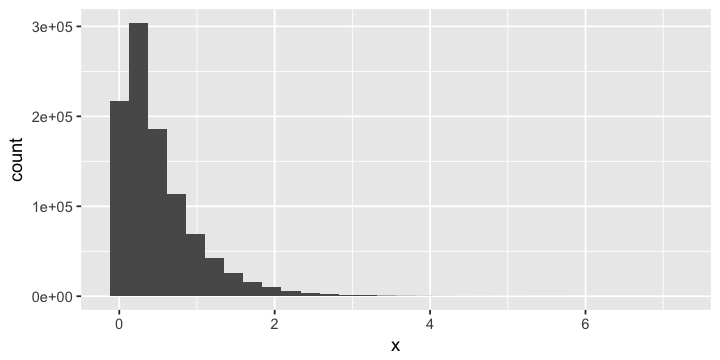

In [20]:
y <- runif(10^6)
x <- -0.5*log(1 - y)
qplot(x)

## В обратную сторону

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


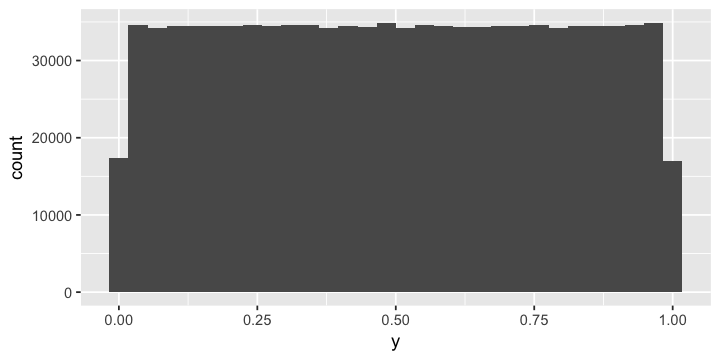

In [21]:
x <- rexp(10^6, rate = 2)
y <- 1 - exp(-2*x)
qplot(y)

Вот и все дела. Аналогично можно попробовать получить какую-нибудь случайно величину с заранее известной функцией распределения. Давайте попробуем получить случайную величину со следующей функцией распределения: 

$$
F(x) = \begin{cases} 0, x < 0 \\ x^7, x \in [0,1] \\ 1, x > 1 \end{cases}
$$

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


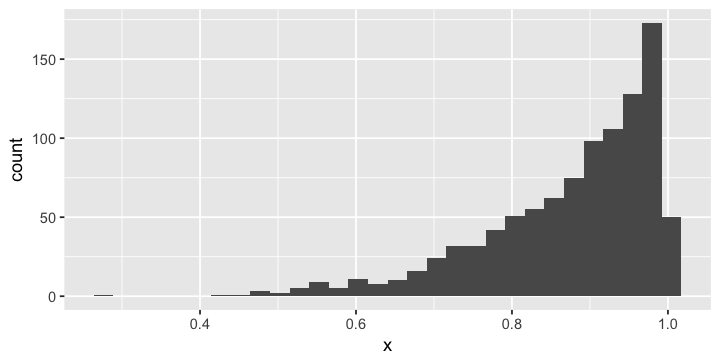

In [22]:
y = runif(1000, min = 0, max = 1)
x = y^(1/7)
qplot(x)

Ясное дело, что работать такая схема будет не всегда. Например, её никогда не используют для нормального распределения. Проблема в том, что подсчет обратной функции распределения для него аналитически невозможен, так как интеграл 


$$ 
F(x) = \int_{-\infty}^{x} \frac{1}{\sigma \sqrt{2 \pi}} \cdot e^{-\frac{(t-\mu)^2}{2 \sigma^2}} dt
$$

не берётся. Немного подробнее про разные генераторы случайных чисел можно [почитать на хабре.](https://habrahabr.ru/post/263993/)

# 3. Сходимости случайных величин

Когда мы с вами изучали математический анализ, мы довольно много говорили про сходимости. Мы говорили о поточечной сходимости, о равномерной сходимости и делали мы это довольно долго. Первым же делом в голове возникает вопрос. Почему мы не можем ещё немного поговорить про те же самые сходимости и на этом успокоится. Всё дело в случайностях. Из-за того, что мы вводим их, старые сходимости в каком-то смысле начинают портиться, и для случайных величин приходится выдумывать что-то своё.

Навыдумывали четыре основных вида сходимости. Все они имеют разную силу. Из одних видов следуют другие. И вся взаимосвязь может быть нарисована на вот такой вот замечательной картинке: 


## Какими бывают сходимости 


<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_3/conv.png" width="800"> 


Проведём краткое знакомство. Пойдём с правой части кратинки в левую. 

* Самая слабая сходимость, __сходисость по распределению!__ Чтобы сказать, что последовательность случайных величин $X_n$ сходится по распределению к случайной величине $X$, обычно над стрелочкой пишут букву $L$ или букву $d$ или просто рисуют такую стрелочку $\Rightarrow$. Из-за того, что эта сходимость самая слабая её так иногда и называют, __слабой.__
* Сходимость чуть посильнее, из которой сходимость по распределению является следствием, это __сходимость по вероятности.__ Обычно её обозначают, подписывая над стрелкой букву $p$.
* Сходимость по вероятности, в свою очередь следует из __сходимости почти наверное__ (almost surely). Чтобы обозначить эту сходимость, над стрелкой пишут $a.s.$
* Также сходимость по вероятности следует из __сходимости в среднем порядка $r$.__ Над стрелкой в случае такой сходимости либо подписывают порядок сходимости, либо пишут $L^r$. 

Последние два вида сходимостей самые сильные. Между ними нет чёткой взаимосвязи. Давайте познакомимся со всеми этими сходимостями чуть ближе. Начнём мы при этом со сходимости по вероятности. Она находится на схемке в середине. На её примере легче всего увидеть какие проблемы возникают со случайными величинами, когда мы начинаем рассуждать о них как об обычных последовательностях. 

## 3.1.1 Cходимость по вероятности

Перед тем как говорить о вероятностных сходимостях, давайте вспомним определение обычной сходимости. Говорят, что последовательность неслучайных чисел $a_n$ сходится к числу $A$, если для любого сколь угодно малого числа $\varepsilon >0$ существует число $N(\varepsilon)$ токое, что $\forall n > N(\varepsilon)$ выполняется $\mid a_n - A \mid < \varepsilon$.

Перефразируем. Последовательность сходится к $A$, если мы можем выбрать какое-то маленькое положительное число после которого разница между пределом и каждым членом последовательности будет меньше этого числа. Давайте посмотрим на это чудо из матана на конкретном примере. 

Представим себе последовательность 

$$
a_n = 10 \cdot n^{0.99} \cdot \sin(n) + \pi
$$

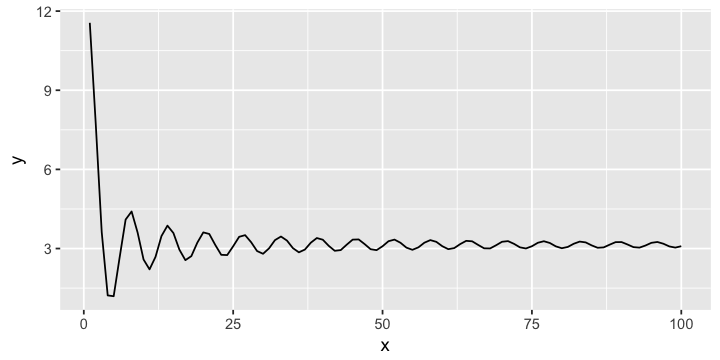

In [23]:
x = 1:100
g = function(x) return(10*x^(-99/100) * sin(x) + pi)

ggplot(data.frame('x'=x, 'y'=g(x))) + 
  geom_line(aes(x, y)) 

Мы видим замечательную штуку. Последовательность сходится! Причём к числу $\pi$. Если мы зафиусируем произвольное число $\varepsilon$, например $1$, мы увидим, что начиная с $N$ примерно равного $10$ все члены последовательности оказываются зажаты в карсной окрестности. 

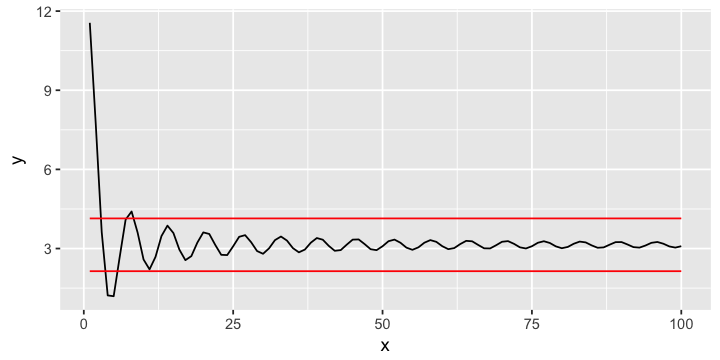

In [24]:
eps1 = 1

ggplot(data.frame('x'=x, 'y'=g(x))) + 
  geom_line(aes(x, y)) +

  geom_line(aes(x, pi+eps1), col='red')+
  geom_line(aes(x, pi-eps1), col='red')

Если взять $\varepsilon$ немного поменьше, то, ясное дело, $N$ сдвинется вправо. Если мы для каждго $\varepsilon$ можем осуществить такой сдвиг вправо, и, начиная с этого сдвига, все члены последовательности будут лежать в намеченом коридоре, то с последовательностью всё в полном порядке. 

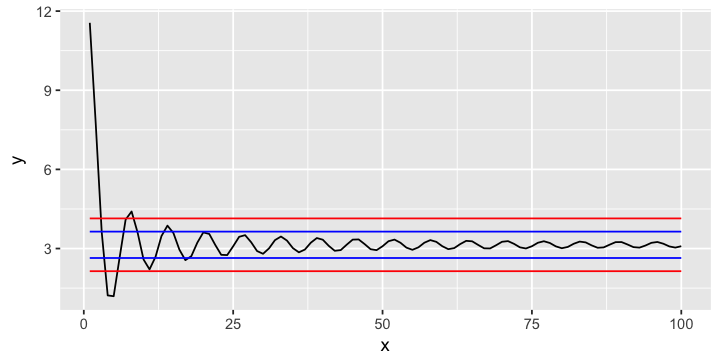

In [25]:
eps1 = 1
eps2 = 0.5

ggplot(data.frame('x'=x, 'y'=g(x))) + 
  geom_line(aes(x, y)) +

  geom_line(aes(x, pi+eps1), col='red')+
  geom_line(aes(x, pi-eps1), col='red')+

  geom_line(aes(x, pi+eps2), col='blue')+
  geom_line(aes(x, pi-eps2), col='blue')

Если мы хотим взять более мелкое значение $\varepsilon$, нам просто надо будет сдвинуться вправо. 

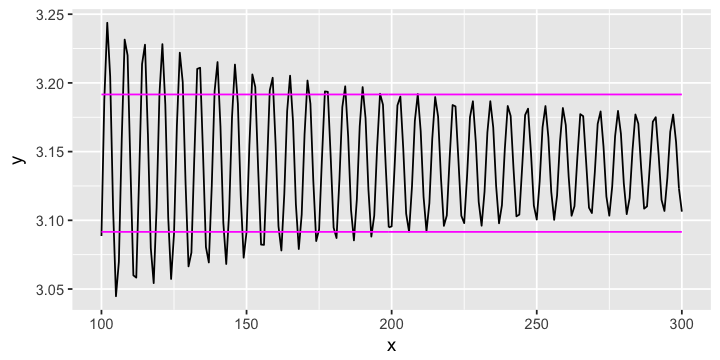

In [26]:
x = 100:300
eps3 = 0.05

ggplot(data.frame('x'=x, 'y'=g(x))) + 
  geom_line(aes(x, y)) +

  geom_line(aes(x, pi+eps3), col='magenta')+
  geom_line(aes(x, pi-eps3), col='magenta')

Вот так обстоят дела с детерминированными последовательностями. В случае, когда речь идёт о последовательностях из случайных величин, всё оказывается немного сложнее.

__Определение:__ Говорят, что последовательность случайных величин $X_n$ _сходится по вероятности_ к $X$ при $n \to \infty$, если

$$ 
P(\mid X_n - X \mid \ge \varepsilon) \to 0
$$

или если 

$$ 
P(\mid X_n - X \mid < \varepsilon) \to 1
$$


В случае сходимости по вероятности, когда мы оказываемся справа за некоторым номером $N(\varepsilon)$, последовательность может пробивать коридор. Но по мере нашего продвижения вправо, вероятность того, что она пробьёт коридор падает. 

Давайте попробуем посмотреть на это на конкретном примере. Предположим, что в наших руках оказалась генеральная совокупность из нормального распределения. Мы сделали из неё выборку некоторого объёма и посчитали по ней выборочное среднее. 

$$
\bar x = \sum_{i=1}^n x_i
$$

Из ЗБЧ мы знаем, что выборочное среднее сходится по вероятности к математическому ожиданию при росте $n$. Давайте посмотрим как это выглядит на практике. 

Зафиксируем какой-нибудь коридор, $\varepsilon$, за которым мы будем в дальнейшем наблюдать. Как можно увидеть, поначалу, при мальньком числе наблюдений, последовательность довольно часто пробивает коридор. Нет такого, чтобы она один раз погрузилась в него и никогда больше из него не выходила. 

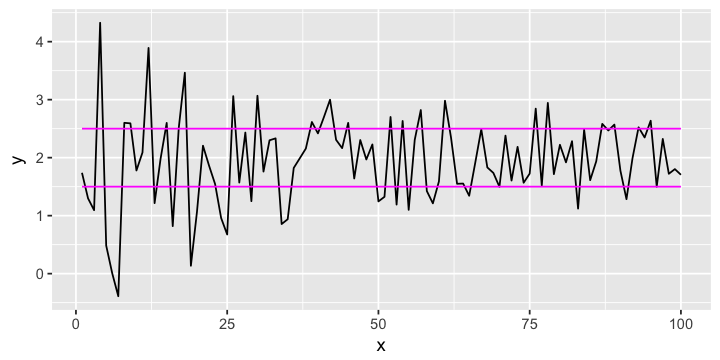

In [32]:
n = 1:100                  # выборка
s <- rep(0, times=100)     # пустой вектор для средних 

for(i in n){
    x <- rnorm(i, mean=2,sd=4)  # оригинальное мат ожидание = 2  
    s[i] <- mean(x) # оценка математического ожидания
}

eps3 = 0.5
ggplot(data.frame('x'=n, 'y'=s)) + geom_line(aes(x, y)) +
  geom_line(aes(x, 2+eps3), col='magenta')+
  geom_line(aes(x, 2-eps3), col='magenta')

Со временем, количество пробоин в зафиксированном коридоре падает, дисперсия становится все меньше и меньше, так как наша последовательность сходится к константе $2$. Последовательность всё ещё иногда пробивает коридор, но вероятность этого падает. 

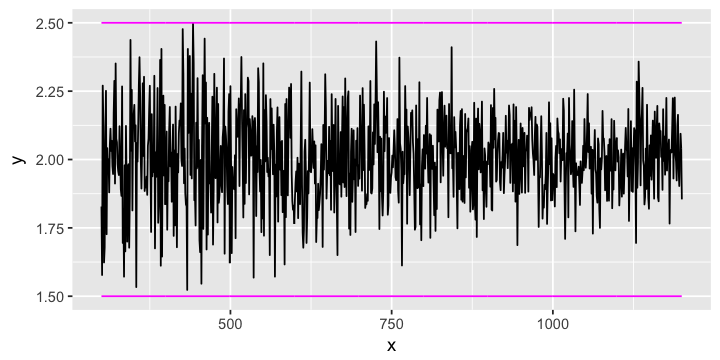

In [33]:
n = 300:1200                 # выборка
s <- rep(0, times=100)       # пустой вектор для средних 

for(i in n){
    x <- rnorm(i, mean=2,sd=4)
    s[i-299] <- mean(x)
}

eps3 = 0.5
ggplot(data.frame('x'=n, 'y'=s)) + geom_line(aes(x, y)) +
  geom_line(aes(x, 2+eps3), col='magenta')+
  geom_line(aes(x, 2-eps3), col='magenta')

Если мы промотаем нашу последовательность при текущем коридоре глубоко вперёд, мы неожиданно для себя обнаружим, что она полностью оказалась внутри коридора. Обратите внимание, что это ни коем образом не означает, что последовательность этот коридор никогда больше не пробьёт. Она пробьёт его, правда вероятность этого стала значительно ниже. 

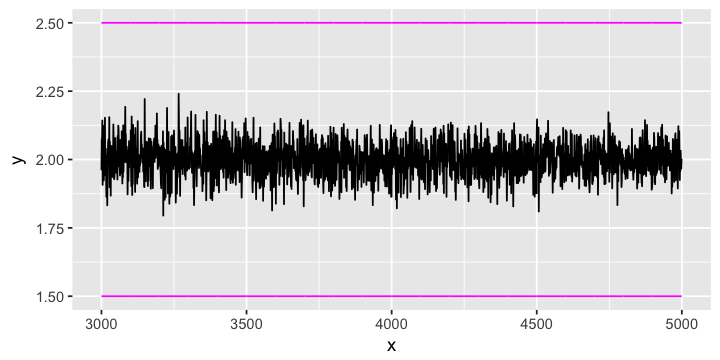

In [29]:
n = 3000:5000                # выборка
s <- rep(0, times=100)       # пустой вектор для средних 

for(i in n){
    x <- rnorm(i, mean=2,sd=4)
    s[i-2999] <- mean(x)
}

eps3 = 0.5
ggplot(data.frame('x'=n, 'y'=s)) + geom_line(aes(x, y)) +
  geom_line(aes(x, 2+eps3), col='magenta')+
  geom_line(aes(x, 2-eps3), col='magenta')

Построим картинку на всём диапазоне.

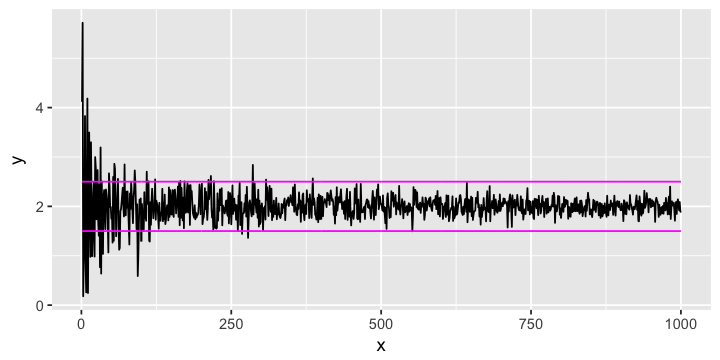

In [30]:
n = 1:1000                # выборка
s <- rep(0, times=100)    # пустой вектор для средних 

for(i in n){
    x <- rnorm(i, mean=2,sd=4)
    s[i] <- mean(x)
}

eps3 = 0.5
ggplot(data.frame('x'=n, 'y'=s)) + geom_line(aes(x, y)) +
  geom_line(aes(x, 2+eps3), col='magenta')+
  geom_line(aes(x, 2-eps3), col='magenta')

Можно попробовать оценить вероятность того, что последовательность из средних пробьёт на конкретном шаге установленный нами коридор. Для этого нам понадобится написать двойной цикл. Почему двойной? Потому что мы хотим получить мног-много траекторий, таких как на картинке выше, а после посмотреть как часто на конкретном шаге, эти траектории пробивают коридор. Частота таких пробоин и будет оценкой вероятности пробить коридор. 

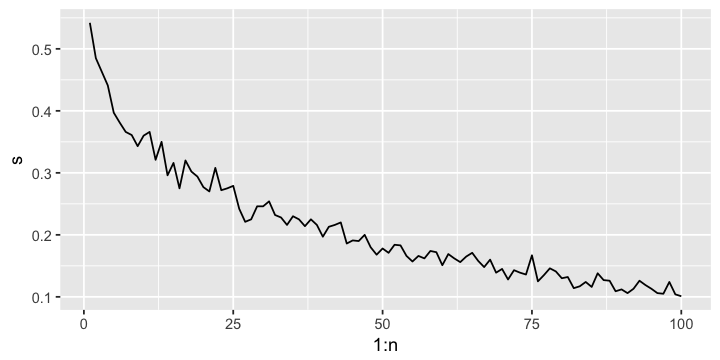

In [34]:
n = 100
s <- rep(0,times=n)  # вектор из нулей 

for(i in 1:n){
    x <- rep(0,times=n)
    for(j in 1:1000){
        x[j] <- mean(rnorm(i, mean=2, sd=4))
    }
    s[i] <- sum(abs(x) > 2+eps3)/1000
    }

qplot(1:n, s, geom='line')

Как мы видим, вероятность пробить коридор поначалу является высокой, но постепенно убывает. Давайте попробуем зафиксировать несколько коридоров и посмотрим как будут вести себя вероятности. 

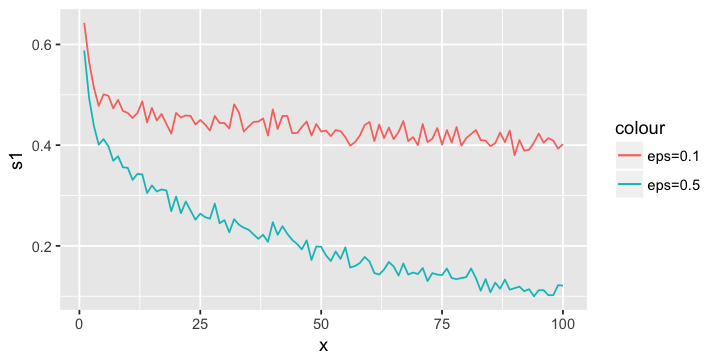

In [35]:
n = 100
s1 <- rep(0,times=n) # вектор из нулей для первого коридора
s2 <- rep(0,times=n) # вектор из нулей для второго коридора

for(i in 1:n){
    x <- rep(0,times=n)
    for(j in 1:1000){
        x[j] <- mean(rnorm(i, mean=2, sd=4))
    }
    s1[i] <- sum(abs(x) > 2+0.5)/1000
    s2[i] <- sum(abs(x) > 2+0.1)/1000
    }

ggplot(data.frame('x'=1:n, 's1'=s1, 's2'=s2)) + 
  geom_line(aes(x, s1, color='eps=0.5')) +
  geom_line(aes(x, s2, color='eps=0.1'))

Аналогичные графики можно было бы построить для дисперсии среднего. Мы же помним, что 

$$
Var(\bar X) = \frac{Var(X_1 + \ldots  + X_n)}{n^2} = \frac{Var(X_1)}{n}.
$$


В знаменателе у нас $n$. По мере роста выборки разброс убывает и среднее сходится к математическому ожиданию. Разобраться в таком графике вам придётся дома. Если не получится, не отчаивайтесь. Мы в следующий раз вспомним про него, когда будем говорить про состоятельность оценок.

Теперь мы знаем как выглядит сходимость по вероятности. Интересно было бы посмотреть как выглядит её отсутствие. Давайте вспомним такую замечательную штуку, как распределение Коши. Помните? Ещё бы не помнили, оно было в домашке! У него не существует математического ожидания и для него выборочному среднему некуда сходиться. Давайте построим для него пару таких же рисунков. 

## 3.1.2 Расходимость по вероятности

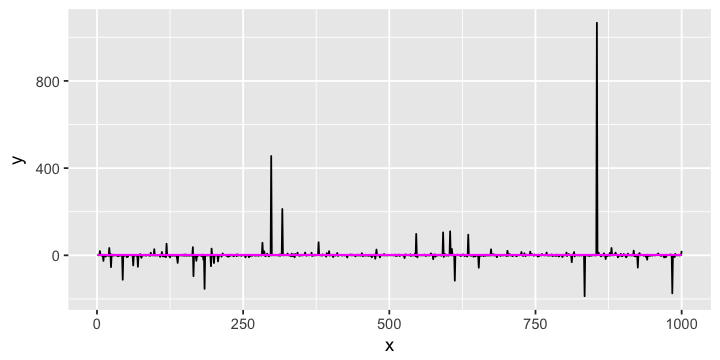

In [39]:
n = 1:1000                 # выборка
s <- rep(0, times=100)     # пустой вектор для средних 

for(i in n){
    x <- rcauchy(i)
    s[i] <- mean(x)
}

eps3 = 0.5
ggplot(data.frame('x'=n, 'y'=s)) +  geom_line(aes(x, y)) +
  geom_line(aes(x, 2+eps3), col='magenta')+
  geom_line(aes(x, 2-eps3), col='magenta')

Постоянные пробои в нашем коридоре. При этом во времени их количество никак не уменьшается. Вот так вот и выглядит отсутствие сходимости по вероятности. Обратите внимание, что величина пробоя не очень важна. В случае, когда сходимость есть, пробои также могут быть очень большими, но они происходят всё реже. Тут они не происходят реже. Давайте убедимся в этом, построив оценку вероятности пробоя для каждого шага. Прямо как мы сделали выше. 

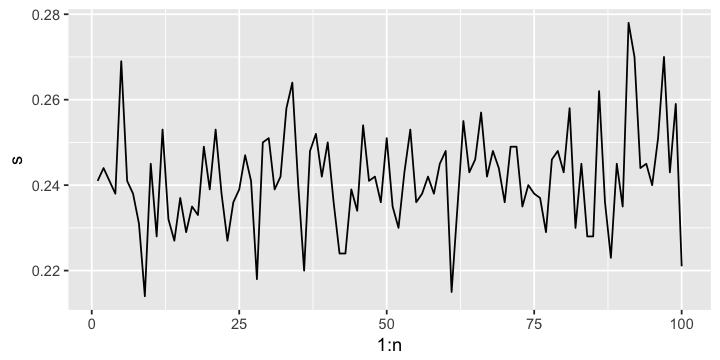

In [40]:
n = 100
s <- rep(0,times=n) # вектор из нулей 

for(i in 1:n){
    x <- rep(0,times=n)
    for(j in 1:1000){
        x[j] <- mean(rcauchy(i))
    }
    s[i] <- sum(abs(x) > 2+eps3)/1000
    }

qplot(1:n, s, geom='line')

Вероятность пробоя на всём промежутке ведёт себя абсолютно непредсказуемо. Одним словом говоря, ужас. Вот мы и познакомились со сходимостью по вероятности. На этом наш спид дэйтинг не останавливается. Мы переходим за следующий стол. Там нас заждалась слабая и ранимая сходимость по распределению.

## 3.2 Сходимость по распределению

Осознать сходимость по распределению довольно просто. Поэтому сразу определение.

__Определение:__ говорят, что последовательность случайных величин $X_1, X_2, \ldots$ сходится к случайной величине $X$ _по распределению,_ если $F_{X_n}(x) \to F_X(x)$ для всех $x$, в которых $F_X(x)$ непрерывна.

Если функции сходятся, она есть. Если не сходятся, её нет. Всё просто. Давайте посмотрим на конкретный пример. 

#### Пример: 

Пусть последовательность $X_1, X_2, \ldots $ это последовательность случайных величин с функциями распределения 

$$
F_{X_n}(x) = \begin{cases} 1 - \left(1 - \frac{1}{n} \right)^{nx} \quad& x > 0 \\ 0 \quad & \text{иначе} \end{cases}
$$



К чему же сходится такое добро? Ответ очевиден! Надо просто найти предел для $F_{X_n}(x)$. Если вы ещё не забыли математический анализ за первый курс, вы легко сможете выяснить, что 

$$
F_X(x) = \lim_{n \to \infty} F_{X_n}(x) = 1 - e^{-x}.
$$

Получаем в пределе экспоненциальное распределение, $Exp(1)$. Теперь давайте посмотрим на всё это добро в картинках. И сразу же мы сталкиваемся с проблемой: нужно сгенерировать специфичное распределение. Но мы то с вами знаем, как эту проблему решить. Помните квантильное преобразование? Давайте подготовим для него обратную функцию, $F_{X_n}^{-1}(x)$:

$$
y = 1 - \left(1 - \frac{1}{n} \right)^{nx} \Rightarrow x = \frac{\ln(1-y)}{n\cdot \ln(1 - ^1/_n)}
$$



In [41]:
# В R можно писать вот такие пафосные циклы:
# item будет по очереди принимать все значения из списка c(5,77,3)
# это питоновский стиль написания циклов, привыкайте :)

for(item in c(5,77,3)){
    print(item^2)
}

[1] 25
[1] 5929
[1] 9


In [45]:
n_obs = 10000

# Создадим табличку, куда мы будем заносить выборки из нашей последовательности.
df = data.frame(number = 1:n_obs)

# Возьмём в табличку 2,5,10 и 100-ую случайные величины из последовательности
for(n in c(2,5,10,100)){
    Y = runif(n_obs, min = 0, max = 1) # равномерное 
    X = log(1-Y)/(n*log(1-1/n))        # сделали квантильное преобразование
    df[paste0('X',n)] = X              # запомнили в табличку выборку
}
df$exp = rexp(n_obs, rate = 1) # записали в табличку выборку из Exp(1), к ней же всё сходится
head(df, 2)

number,X2,X5,X10,X100,exp
1,1.1968962,0.2319774,0.6162913,0.7782988,0.2617445
2,0.5231657,1.0762304,0.4610128,0.4698471,0.6038877


Warning message:
“Removed 160 rows containing non-finite values (stat_ecdf).”Warning message:
“Removed 376 rows containing non-finite values (stat_ecdf).”Warning message:
“Removed 408 rows containing non-finite values (stat_ecdf).”Warning message:
“Removed 483 rows containing non-finite values (stat_ecdf).”Warning message:
“Removed 482 rows containing non-finite values (stat_ecdf).”

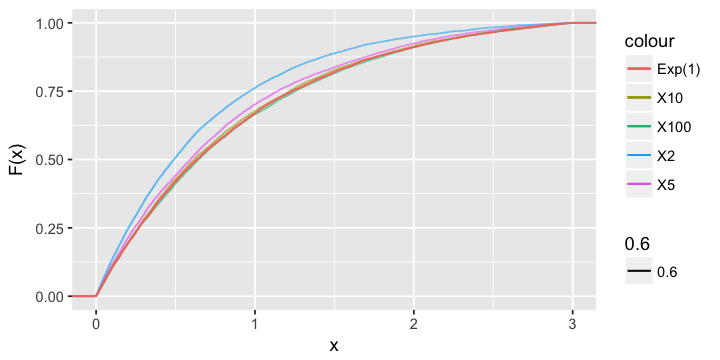

In [52]:
# Строим все функции распределения на одном графике
ggplot(df) +   
    stat_ecdf(aes(x = X2,  colour = 'X2', alpha=0.6)) +
    stat_ecdf(aes(x = X5,  colour = 'X5', alpha=0.6)) +
    stat_ecdf(aes(x = X10, colour = 'X10', alpha=0.6)) +
    stat_ecdf(aes(x = X100, colour = 'X100', alpha=0.6)) +
    stat_ecdf(aes(x = exp, colour = 'Exp(1)')) +
    xlab('x') + ylab('F(x)') + xlim(0,3)

Что мы видим? Последовательность из заданных выше функций распределения сходится к функции распределения экспоненциальной случайной величины, как мы и ожидали. Как выглядит отсутствие такой сходимости, я думаю, понятно. Поэтому примера для демонстрации её отсутствия, я искать не буду. 

Напомню, что сходимость по распределению самая слабая. Если есть сходимость по вероятности, то будет и сходимость по распределению.  Переходим за следующий стол. Впереди третье свидание.

## 3.3 Сходимость в среднем

__Определение:__ последовательность случайных величин $X_1, X_2, \ldots$ сходится _в среднем порядка $r$_ к случайной величине $X$, если 

$$
\lim_{n \to \infty} E(|X_n - X|^r) = 0.
$$

Снова идеологически ничего сложного. Если модуль математического ожидания между $X_n$ и $X$ с ростом $n$ уменьшается, то всё отлично. А если не уменьшается, то не очень отлично. Давайте посомтрим на конкретном примере. 

#### Пример:

Пусть $X_n \sim U[0, \frac{1}{n}]$. Покажем, что $X_n$ сходится в среднем порядка $r$ к нулю для любого положительного $r$. Сначала сделаем это в теории. Для равномерного распределения 

$$
f_{X_n}(x) = \begin{cases} n, \quad 0 \le x \le \frac{1}{n} \\ 0, \quad \text{ иначе} \end{cases}
$$

Найдём 

$$
E(|X_n - 0|^r) = \int_0^{^1/_n} x^r \cdot n dx = \frac{1}{(r + 1) \cdot n^r} \to 0 \quad \forall r \ge 1.
$$

В подобранном примере все $x$ положительные, поэтому проблем с модулем не возникло. 

Как это изобразить на картинке? Ну, наверное просто нарисовать последовательность из математических ожиданий. Другого способа я не вижу. 

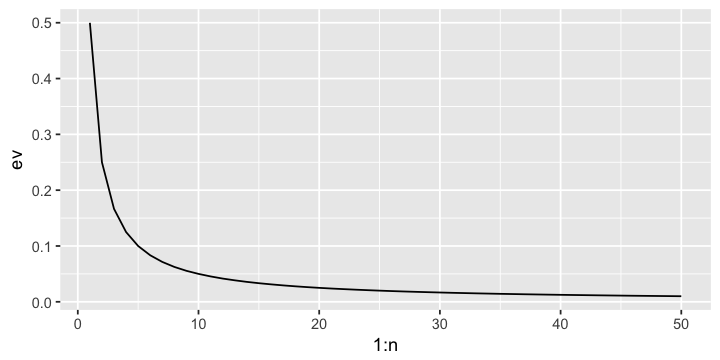

In [53]:
n_obs = 10^6   # число симуляций
n = 50         # длина последовательности для рисунка
ev = rep(0,n)  # сюда будем записывать мат ожидания, ev ~ expected value

for(i in 1:n){
    ev[i] = mean(runif(n_obs, min = 0, max = 1/i))
}

qplot(1:n, ev, geom='line')

Обратите внимание, что из сходимости в среднем автоматически следует сходимость по вероятности и сходимость по распределению. Так всегда.

Сходимость по вероятности можно углядеть, если понять, что дисперсия случайной величины $X_n$ с каждым новым $n$ всё меньше. Сходимость по распределению к вырожденному распределению можно углядеть, если заметить, что в плтоности распределения фигурирует $1/n$. Точно такое же $1/n$ будет фигурировать в функции распределения и последовательность из них будет сходиться к вырожденному распределению.

Но это нас сейчас не особо интересует. Сходимость в среднем сильнее сходимости по вероятности. В связи с этим нам хотелось бы увидеть живое подтверждение этому. Давайте убедимся, что последовательность случайных величин из следующего примера будет сходиться к нулю по вероятности, но никакой сходимостью в среднем, там и в помине не пахнет. 

#### Пример: 

Пусть последовательность дискретных случайных величин задаётся следующим незатейливым образом: 

$$
X_n = \begin{cases} n^2, \qquad p = \frac{1}{n} \\ 0, \qquad p = 1 - \frac{1}{n} \end{cases} 
$$

Эта последовательность будет сходиться к нулю по вероятности. В теории это можно довольно легко показать:
$$
\lim_{n \to \infty} P(|X_n - 0| \ge \varepsilon) = \lim_{n \to \infty} P(X_n = n^2) = \lim_{n \to \infty} \frac{1}{n} = 0
$$



Почему $P(|X_n - 0| \ge \varepsilon) = P(X_n = n^2)$, я думаю, понятно. Число $n$ растёт во времени, а $\varepsilon$ произвольное маленькое число. Чтобы разница $X_n - 0$ оказалась больше этого произвольного маленького числа, нужно, чтобы случайная величина приняла значение $n^2$. 

Эта последовательность не будет сходиться к нулю в среднем. Покажем это! 

$$
\lim_{n \to \infty} E(|X_n|^r) = \lim_{n \to \infty} (n^{2r} \cdot \frac{1}{n} + 0 \cdot (1- \frac{1}{n})) = \lim_{n \to \infty} n^{2r - 1} = \infty \qquad \forall r \ge 1
$$

Вот такая вот досада. А теперь, картинки! 

In [75]:
n_obs = 10^4

ev = rep(0,500)  # вектор для средних
s = rep(0,500)   # вектор для значений случайной величины

for(i in 2:501){
   x = sample(c(i^2,0), size=n_obs, p = c(1/i, 1-1/i), replace = TRUE)
   ev[i] = mean(x) 
   s[i] = x[1]     # чтобы посмотреть на одну траекторию, подойдёт любое значение
}

Видим, что в случае сходимости по вероятности переодически случаются пробои нашего вооброжаемого коридоа, но их вероятность всё меньше и меньше. Это означет, что последовательность сходится по вероятности к нулю. Мы это уже должны осознавать также как то, что небо голубое.

А вот со средними возникают проблемы. Их довольно жёстко колбасит. причём колбасит со всё возрастающей дисперсией. Никакой сходимостью в среднем тут и не пахнет.

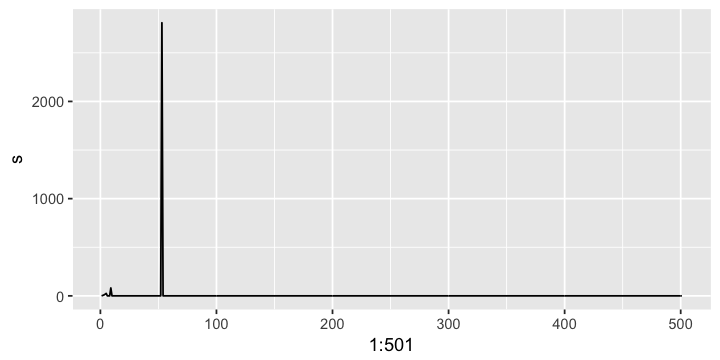

In [76]:
qplot(1:501,s,geom='line')

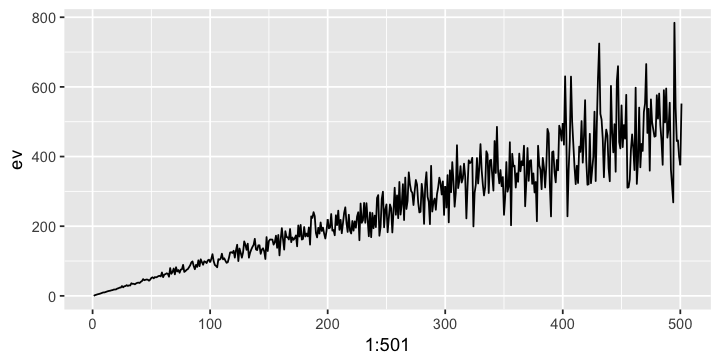

In [77]:
qplot(1:501,ev,geom='line')

Вот такая вот история. Одни сходимости непривередливы, другие довольно капризны. Осталась встреча с ещё одной, на мой взгляд, самой капризной сходимостью. Сходимостью почти наверное.

## 3.4 Сходимость почти наверное

Ух. Остался самый хард. Приготовьте свой мозг. Его сейчас начнёт потихонечку сводить. Дело в том, что сходимость почти наверное довольно глубокая штука и определяется на фундаментальных понятиях из тервера. Поэтому нам придётся копнуть в теорию, прежде чем сформулировать определение. 

На одной из первых лекции, вам сказали, что есть пространство элементарных исходов $\Omega$. В этом пространстве живут исходы $\{\omega_1, \ldots, \omega_n\}$. Множества из таких исходов - это события. Из событий составляется список с определёнными свойствами. Этот список называется сигма-алгеброй. Именно на нём определена вероятность, то есть функция отображающая каждое событие из сигма-алгебры на отрезок $[0; 1]$ и обладающая набором няшных свойств.

Случайная величина - это функция, которая отображает пространство элементарных исходов на множество действительных чисел, $X(\omega) : \Omega \to \mathbb{R}$. Ясное дело, у неё тоже должны быть всякие няшные свойства, которые мы опустим для простоты. 

Если уже начало сводить мозг, откиньтесь назад на стуле и помассируйте себе виски. Это только начало, нам нужно сохранять себя в тонусе. Судороги прекратились? Продолжаем чтение! 

До текущего момента мы не особо вдавались в подробности, связанные с тем как устроена случайная величина $X(\omega)$ при разных значениях $\omega$. Всем сходимостям выше было на это наплевать. Со сходимостью почти наверное другая история. 

Чтобы стало немного полегче понять определение, давайте решим упражнение. Пусть у нас есть монетка и мы подкидываем её один раз. Проcтранство элементарных исходов в таком случае выглядит как-то так: $\Omega = \{О, Р\}$. В пространстве живут два исхода. Определим последовательность случайных величин следующим образом.

$$
X_n(\omega) = \begin{cases} \frac{n}{n+1}, \qquad \omega = O \\ (-1)^n, \qquad \omega = P \end{cases}
$$

Пусть мы один раз подбрасываем монетку, а затем выписываем последовательность. Давайте ответим на пару вопросов. 

a) Для каких $\omega$ последовательность случайных велчин сходится? 

Ответ прост. Ежели выпал орёл, то последовательность вошла в траекторию $\frac{n}{n+1}$ и сошлась к единице. Если выпала решка, то всё пропало. 

b) Найдём вероятность $$ P(\lim_{n \to \infty} X_n(\omega) = 1).$$

Перевожу. Нам нужно найти вероятность события, которое заключается в том, что наша последовательность сойдётся. Очевидно, что такая вероятность равна $0.5$, так как последовательность будет сходиться только при выпадении орла. Обычно эту вероятность записывают вот так: 

$$ P(\{\omega \in \Omega : \lim_{n \to \infty} X_n(\omega) = 1\}).$$



Читаем по символам: вероятность множества омег, на которых последовательность сходится. То есть вероятность события, состоящего в том, что последовательность сходится. Ежели эта вероятность равна единице, то сходимость наступает почти наверное. Если среди омег можно найти какую-то подпоследовательность из случайных величин, где сходимости нет, то всё пропало, сходимости нет. В нашем случае таким набором омег является решка. Ей соответствует расходящаяся последовательность. Ух! Копнули так копнули. Внимание, определение! 

__Определение:__ говорят, что последовательность случайных величин $X_1, X_2, \ldots$ сходится к случайной величине $X$ почти наверное, если 

$$ P(\{\omega \in \Omega : \lim_{n \to \infty} X_n(\omega) = X(\omega)\}) = 1.$$

Давайте попробуем проилюстрировать всё вот это вот на примере, который мы уже видели выше. Возьмём дискретную случайную величину

$$
X_n = \begin{cases} n^2, \qquad p = \frac{1}{n} \\ 0, \qquad p = 1 - \frac{1}{n} \end{cases} 
$$

Как мы уже знаем, она сходится по вероятности. Почему? Потому что, она с ростом $n$ принимает всё большие значения с всё меньшей вероятностью.

Сходимость почти наверное для этой случайной величины зависит от того как именно она устроена на пространстве элементарных исходов.  Например, она может быть устроена вот так: 


<img src="http://old.nsu.ru/mmf/tvims/chernova/tv/lec/img1340.gif" height="600" width="600"> 


Простите. Я брал этот пример из [учебника Черновой (нет, не Марии Игоревны, другой Черновы)](http://old.nsu.ru/mmf/tvims/chernova/tv/lec/node53.html). Мне было лень исправлять буквы кси на иксы, а седьмые степени на вторые. Вы мысленно должны это сделать сами. Обещаю исправится. Кстати говоря, если я пишу не очень понятно, загляните в Чернову. 

Что происходит на картинке? Значения, которые принимает случайная величина уточняются в соотвествии с возможными омегами. Мы влезаем в структуру этой величины и говорим, что 

$$
X_n = \begin{cases} n^2, \qquad \omega \in (1-\frac{1}{n}, 1] \\ 0, \qquad \omega \in [0, 1 - \frac{1}{n}] \end{cases} 
$$

Получается, что у нас отрезочек из элементарных исходов, на котором случайная величина принимает большие значения, становится всё меньше и меньше и вероятность того, что среди элементарных исходов нельзя подобрать расходящейся подпоследовательности,

$$P(\{\omega \in \Omega : \lim_{n \to \infty} X_n(\omega) = X(\omega)\}),$$ действительно, равна единице. Последовательность сходится почти наверное. 

Мы могли бы задать последовательность как-нибудь иначе. Например, заставить отрезок длины $^1/_n$, на котором выпадает $n^2$, бегать по отрезку $[0; 1]$ так, чтобы любое $\omega$ попадала в него бесконечное число раз и тем самым существовала бы подпоследовательность $X_{n_k} \to \infty$. Тогда бы никакой сходимости почти наверное не было бы. 

Сложно ли это? Похоже на то. Кстати говоря, ещё раз обратите внимание на то, что сходимость почти наверное не имеет прямых связей со сходимостью в среднем. Для рассмотренного выше примера сходимость в среднем не выполняется. Сходимость почти наверное может как выполняться, так и не выполняться в зависимости от устройства пространства элементарных исходов.

Какого-то примера с генерациями я, к сожалению, для этого раздела не подобрал. Если кто-то что-то знает и может подсказать, буду рад! 

Остался последний нюанс. А почему сходимость называется сходимостью почти наверное? Что за игра слов такая? Ответ на этот вопрос довольно мозгодробительный. Ваше естество будет сопротивляться ему.

## 3.5 Почему почти наверное? 

Если вероятность некоторого события равна единице, то такое событие называют достоверным. Если вероятность некоторого события равна нулю, то такое событие называют невозможным. 

__Очень важно__ понимать тонкую разницу между событием, которое не произойдёт никогда и тем, вероятность которого равна нулю.  Нулевая вероятность события вовсе не означает того, что это событие никогда не наступит. Чисто теоретически наступление такого события возможно, но вероятность этого события равна нулю. Например, вероятность того, что непрерывная случайная величина попадёт в какую-то конкретную точку равна нулю. Тем не менее, сгенерировав такую случайную величину на компьютере, мы увидим, что она приняла конкретное значение, то есть попала в некоторую точку. Удивительно, но при каждой реализации случайной величины мы наблюдаем невозможное событие. Шокирует, не правда ли? Точно также важно понимать разницу между утверждением верным всегда и почти наверное верным. 

Ещё один пример. Представим себе как игрок в дартс бросает в мишень дротик. Пусть, как бы игрок не метнул дротик, он всегда попадает в мишень. Вероятность того, что дротик попадёт в какой-то конкретный регион мишени равна отношению площади этого региона к общей площади мишени. Например, вероятность того, что дротик попадет в правую половину мишени равна $0.5$. 

Рассмотрим событие "дротик попадает в конкретную хорду мишени". Площадь хорды равна нулю. То есть дротик не попадет в хорду почти наверное.

Тем не менее множество точек на хорде не пусто и попадание в неё является чисто теоретически возможным. То же самое можно сказать и о любой другой точке на мишени. Так как любая точка будет иметь нулевую площадь, дротик не попадет в неё почти наверное. Однако дротик точно должен попасть в какую-то точку мишени! Таким образом при каждом бросании дротика происходит событие, имеющее нулевую вероятность. Вот такой вот странный объект - вероятность. 

## 4 Знаменитые сходимости, про которые вы уже знаете

Мы осознали, что сходимости бывают разными и постарались на интуитивном уровне прочувствовать их. Давайте теперь освежим в голове те сходимости, которые мы уже знаем. 

### 4.1 Закон больших чисел

Этому парню мы посвятили итак много времени. Скажем лишь две вещи. Есть __слабый закон больших чисел__, который говорит, что выборочное среднее __сходится по вероятности__ к математическому ожиданию.  Есть __усиленный закон больших чисел__, который говорит, что выборочное среднее __почти наверное сходится__ к математическому ожиданию. Ясное дело, в законах разные предпосылки, накладываемые на случайные величины. За подробностями в учебники! 

### 4.2 Центральная предельная теорема

Этой даме мы тоже посвятили много времени. Скажем лишь то, что в ЦПТ имеет место __сходимость по распредлению,__ и двинемся дальше. 

### 4.3 Схема испытаний Бернулли и теорема Муавра-Лапласа

Помните схему исптаний Бернулли? Она состояа в том, что у нас есть монетка, которая выпадает орлом с вероятностью $p$. Если он выпал, то это успех. Мы делали $n$ подбрасываний и хотели узнать какова вероятность того, что успехов будет ровно $m$. Иными словами, нас интересовало распределение случайной величины $X$, числа успехов, то есть орлов. Вероятность того, что у нас окажется ровно $m$ успехов выглядела так: 

$$
P(X = m) = C_n^m \cdot p^m \cdot (1-p)^{n-m}.
$$

Мы говорили, что если значения $m$ и $n$ очень высоки, то считать $C_n^m$ будет затруднительно из-за того, что там возникают факториалы. Из-за этого мы искали формулы для приближённого вычисления. Таких формул было целых три, каждая из них была сформулированна как отдельная теорема со своими предпосылками. Исторически эти формулы родились ещё до ЦПТ и изначально были доказаны при участии формулы стирлинга, рядов тэйлора и прочих брутальных приколов из матана. Тем не менее, две из них являются прямым следствием из ЦПТ.

__Предельная теорема Муавра-Лапласа:__

Пусть успех может произойти в любом из испытаний с вероятностью $p$ и пусть $m$ - число успехов, а $n$ - число испытаний, тогда

$$
P_n(m) = \frac{1}{\sqrt{npq}} \cdot \frac{1}{\sqrt{2\pi}} \cdot e^{-\frac{x^2}{2}},\text{ где } x = \frac{m - np}{\sqrt{npq}}.
$$

Так было написано в лекциях. Мы сформулируем это немного иначе. 

Пусть успех может произойти в любом из испытаний с вероятностью $p$ и пусть $m$ - число успехов, а $n$ - число испытаний, тогда $\frac{m - np}{\sqrt{npq}} \Rightarrow N(0,1)$.

Стало как-то полаконичнее. Докажем это. Мы знаем, что $m = X_1 + \ldots + X_n,$ где каждая случайная величина $X_i$ принимает значение $1$ с вероятностью $p$. Мы можем вычислить, что $E(X_i) = p$, а $Var(X_i) = pq$. Осталось дело за малым, просто использовать ЦПТ. 

In [78]:
n_obs = 10000    # число наблюдений 
p = 0.5

df = data.frame(number = 1:n_obs)  # табличка для наблюдений 

for(n in c(10,20,100,2000)){
    # X <- rbinom(n_obs, size = n, prob = p)  # генерим выборку неправильно 
    # генерим выборку правильно
    X <- (rbinom(n_obs, size = n, prob = p) - n*p)/(sqrt(n*p*(1-p))) 
    df[paste0('X',n)] = X                   # заносим её в табличку 
}

df$norm = rnorm(n_obs) # разбавляем всё это добро Нормальным распределением

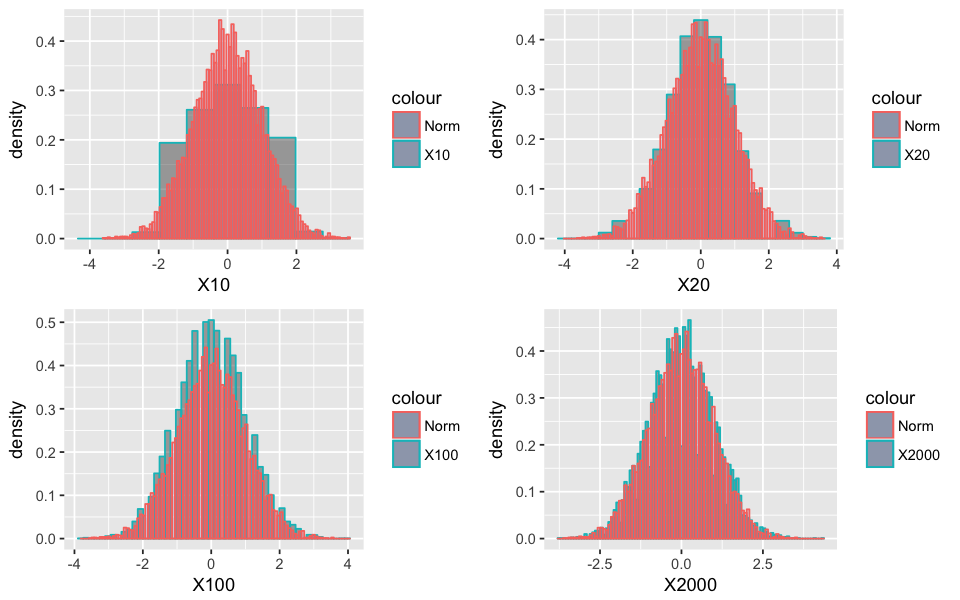

In [79]:

options(repr.plot.width=8, repr.plot.height=5)  # размеры картинки

p1 = ggplot(df)+
    # гистограмма для текущей случайной величины
    geom_histogram(aes(y=..density.., x=X10, colour = 'X10'), alpha=0.5, bins=10) +
    # гистограмма для предельного распределения 
    geom_histogram(aes(y=..density.., x=norm, colour = 'Norm'),fill = "cornflowerblue", alpha=0.2, bins = 100)

p2 = ggplot(df)+
    geom_histogram(aes(y=..density.., x=X20, colour = 'X20'), alpha=0.5, bins = 20) +
    geom_histogram(aes(y=..density.., x=norm, colour = 'Norm'),fill = "cornflowerblue", alpha=0.2, bins = 100)

p3 = ggplot(df)+
    geom_histogram(aes(y=..density.., x=X100, colour = 'X100'), alpha=0.5, bins = 50) +
    geom_histogram(aes(y=..density.., x=norm, colour = 'Norm'),fill = "cornflowerblue", alpha=0.2, bins = 100)

p4 = ggplot(df)+
    geom_histogram(aes(y=..density.., x=X2000, colour = 'X2000'), alpha=0.5, bins = 100) +
    geom_histogram(aes(y=..density.., x=norm, colour = 'Norm'),fill = "cornflowerblue", alpha=0.2, bins = 100)

# Располагаем графики рядом.
pushViewport(viewport(layout = grid.layout(2, 2)))
print(p1, vp = viewport(layout.pos.row = 1, layout.pos.col = 1))
print(p2, vp = viewport(layout.pos.row = 1, layout.pos.col = 2))
print(p3, vp = viewport(layout.pos.row = 2, layout.pos.col = 1))
print(p4, vp = viewport(layout.pos.row = 2, layout.pos.col = 2))

Интегральную предельную теоремы с доказательством я тут расписывать не хочу. За ней в учебник Черновой.

### 7.4 Формула Пуассона

Когда значение $n$ было довольно большим, а вероятность успеха $p$ была довольно маленькой, мы пользовались другой приближённой формулой. Теорему с ней можно найти либо в своих записях лекций, либо в учебнике Черновой на странице 47. Можно ещё посмотреть её в [онлайн версии учебника.](http://old.nsu.ru/mmf/tvims/chernova/tv/lec/node21.html#SECTION000650)

Если перевести всё, что там написано на язык последовательностей, можно сказать, что дана последовательность случайных величин $X_n \sim Binomial(n, \frac{\lambda}{n})$. В данном случае $\frac{\lambda}{n}$ как раз и обеспечивает убывание вероятности успеха от серии к серии. Давайте посмотрим к чему сходится такая последовательность случайных величин. Сначала в теории, потом в симуляциях.

В теории последовательность сходится по распределению к распределению Пуассона, $X_n \Rightarrow Poiss(\lambda)$. В первом семестре вы доказали это вот таким вот незатейливым образом:


$$
\begin{multline}
\lim_{n \to \infty} P_{X_n}(k) = \lim_{n \to \infty} C_n^k \cdot \left( \frac{\lambda}{n} \right)^k \cdot \left(1 - \frac{\lambda}{n} \right)^{n-k}  = \lambda^k \cdot \lim_{n \to \infty} \frac{n!}{k! \cdot (n-k)!} \cdot \frac{1}{n^k} \cdot \left(1 - \frac{\lambda}{n} \right)^{n-k} = \\ =
\frac{\lambda^k}{k!} \lim_{n \to \infty} \underbrace{\left[ \frac{n (n-1) \ldots (n-k+1)}{n^k}\right]}_{1} \cdot \underbrace{\left[  1 - \frac{\lambda}{n} \right]^n}_{e^{-\lambda}} \cdot \underbrace{\left[ 1 - \frac{\lambda}{n}   \right]^{-k}}_{1} = \frac{e^{-\lambda} \cdot \lambda^k}{k!}
\end{multline}
$$

Если говорить подробнее, то вы просто-напросто посмотрели к чему сойдётся последовательность из законов распределений Бернулли и нашли распределение Пуассона. Это была ваша первая встреча с ним. Если задуматься и глянуть на это всё, то становится понятно, что такое приближение уместно применять тогда, когда $n$ велико, а $p$ мало. Отсюда выскакиевает непосредственное применение случайной величины, имеющей распределения Пуассона для моделирвоания счётчиков: число лайков, число людей в очереди и т.п.

Посмотрим как это выглядит на картинке. 



In [80]:
n_obs = 10000    # число наблюдений 
lambda = 8       # значение параметра 

df = data.frame(number = 1:n_obs)  # табличка для наблюдений 

for(n in c(10,20,50,200)){
    X <- rbinom(n_obs, size = n, prob = lambda/n)  # генерим выборку
    df[paste0('X',n)] = X                          # заносим её в табличку 
}

df$poiss = rpois(n_obs, lambda = lambda) # разбавляемс всё это добро Пуассоном

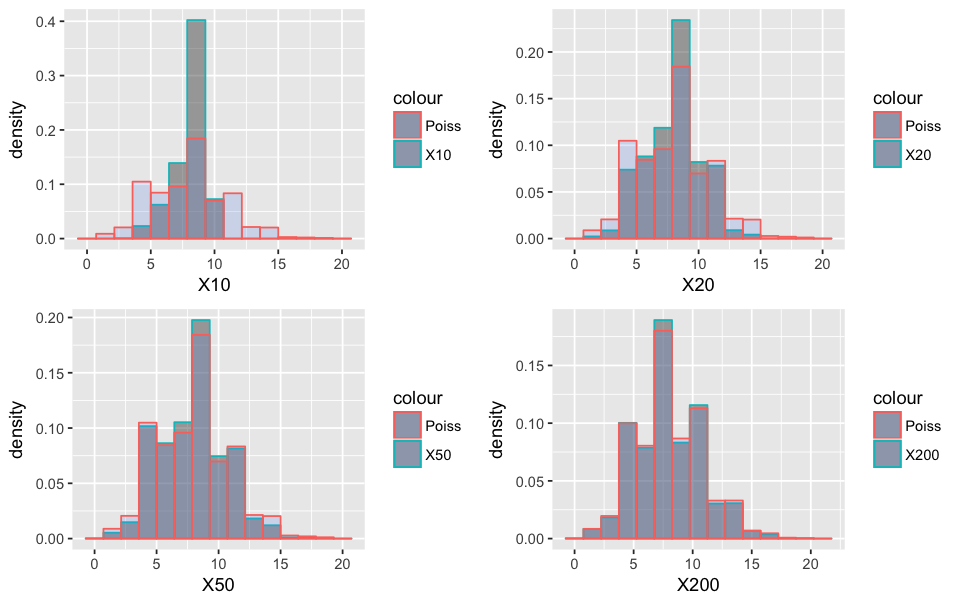

In [81]:
options(repr.plot.width=8, repr.plot.height=5)  # размеры картинки

p1 = ggplot(df)+
    # гистограмма для текущей случайной величины
    geom_histogram(aes(y=..density.., x=X10, colour = 'X10'), alpha=0.5, bins = 15) +
    # гистограмма для предельного распределения 
    geom_histogram(aes(y=..density.., x=poiss, colour = 'Poiss'),fill = "cornflowerblue", 
                                       alpha=0.2, bins = 15)

p2 = ggplot(df)+
    geom_histogram(aes(y=..density.., x=X20, colour = 'X20'), alpha=0.5,  bins = 15) +
    geom_histogram(aes(y=..density.., x=poiss, colour = 'Poiss'),fill = "cornflowerblue",
                                       alpha=0.2, bins = 15)                   

p3 = ggplot(df)+
    geom_histogram(aes(y=..density.., x=X50, colour = 'X50'), alpha=0.5,  bins = 15) +
    geom_histogram(aes(y=..density.., x=poiss, colour = 'Poiss'),fill = "cornflowerblue",
                                       alpha=0.2, bins = 15)

p4 = ggplot(df)+
    geom_histogram(aes(y=..density.., x=X200, colour = 'X200'), alpha=0.5,  bins = 15) +
    geom_histogram(aes(y=..density.., x=poiss, colour = 'Poiss'),fill = "cornflowerblue",
                                       alpha=0.2, bins = 15)

# Располагаем графики рядом.
pushViewport(viewport(layout = grid.layout(2, 2)))
print(p1, vp = viewport(layout.pos.row = 1, layout.pos.col = 1))
print(p2, vp = viewport(layout.pos.row = 1, layout.pos.col = 2))
print(p3, vp = viewport(layout.pos.row = 2, layout.pos.col = 1))
print(p4, vp = viewport(layout.pos.row = 2, layout.pos.col = 2))

Вот такая вот сходимость. Надеюсь, что это небольшой пункт оставил у вас в голове хоть какое-то понимание о том как связаны между собой биномиальное распределение, распределение пуассона и нормальное. В обеих ситуациях __сходимость по распределению.__ На этом про сходимости всё. Они стали для нас обыденным явлением и мы готовы с ними сталкиваться на ежедневной основе. 

## Почиташки 

* [Иллюстрация теоремы Гливенко-Кантели в R.](https://www.r-bloggers.com/convergence-and-asymptotic-results/) Можно посмотреть как в R построить красивые графики, на которых эмпирическая функция распределения почти наверное сходится к теоретической. На лекциях у вас была такая теорема без красивого названия и без доказательства. 
* [Хороший конспект по разновидностям сходимостей](https://www.probabilitycourse.com/chapter7/7_2_8_solved_probs.php) вместе с хорошей коллекцией задачек по ним. Рекомендую немного почитать об этом и попробовать решить задачки. Часть из них есть в домашке. Обратите внимание, что обычно доказывать наличие сходимости почти наверное напрямую это довольно трудная задачка. Поэтому для неё выделяют всякие разные признаки. В этом конспекте есть парочка признаков. Если хочется углубиться в них, добро пожаловать :) 
* [Учебник Черновой по терверу.](https://github.com/FUlyankin/r_probability/raw/master/books/Хороший%20учебник%20по%20терверу.pdf)
